# Time Series -- Episode 3  
1. Apply a time Series libray "Prophet" to predict the time series
2. Decompose the time series into trend and seasonality
3. Examine the performance of the prediction via cross validation

- Blogs(https://teamyan.wordpress.com/)
- Codes (https://github.com/aayancheng/timeseries)

In [1]:
#loading the pandas and matplotlib libraries
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
# Note that the way the file is stored in your folders will affect the code below:
# we store the data file under a data sub-folder called "data_for_ts" 
# and this notebook is saved under "Timeseries"  folder.

df = pd.read_csv('../Timeseries/data_for_ts/weatherAUS.csv')

In [14]:
# we will focus on the temperature data for Sydney
# and set the dataframe index to DateTimeIndex type
sydn = df[df['Location']=='Sydney']
sydn['Date'] = pd.to_datetime(sydn['Date'])
sydn.index = sydn['Date']
sydn.head()

<ipython-input-14-94d28a61e908>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sydn['Date'] = pd.to_datetime(sydn['Date'])


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
2008-02-02,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2008-02-03,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
2008-02-04,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
2008-02-05,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [16]:
# The following code is to check the data type and index for Data is set correctly
# sydn.info()

<AxesSubplot:xlabel='Date'>

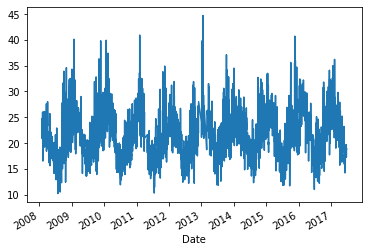

In [8]:
# Our first look on a time series which is the temperature at 3 p.m.
sydn['Temp3pm'].plot()

## Let's apply a time series model on Sydney temperature
We import the facebook time series model called Prophet which can decompose the time series into
- Trend + Seasonality + Holiday + Error

https://facebook.github.io/prophet/

In [9]:
# first import the library from Prophet 
from fbprophet import Prophet

In [20]:
# Prophet requires the dataframe to have only two columns: date and numerical value
ts = sydn[['Date','Temp3pm']]
ts.columns=['ds','y']
ts.head()

,ds,y
Date,,
2008-02-01,2008-02-01,20.9
2008-02-02,2008-02-02,24.8
2008-02-03,2008-02-03,23.0
2008-02-04,2008-02-04,20.9
2008-02-05,2008-02-05,25.5


In [24]:
# Call the prophet model and apply its fit method
model = Prophet()
model.fit(ts)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
# lets use the model to predict the temperature for the next 2 years
future = model.make_future_dataframe(periods=730)
forecast = model.predict(future)

In [31]:
# print out the last 5 days of the prediction
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4069,2019-06-21,22.382651,14.158096,21.993579,21.855889,22.910358,-4.267523,-4.267523,-4.267523,0.091622,0.091622,0.091622,-4.359146,-4.359146,-4.359146,0.0,0.0,0.0,18.115127
4070,2019-06-22,22.382968,14.297936,21.822684,21.855143,22.911660,-4.392169,-4.392169,-4.392169,-0.020964,-0.020964,-0.020964,-4.371205,-4.371205,-4.371205,0.0,0.0,0.0,17.990799
4071,2019-06-23,22.383285,14.243976,21.887080,21.854498,22.912963,-4.439841,-4.439841,-4.439841,-0.053486,-0.053486,-0.053486,-4.386355,-4.386355,-4.386355,0.0,0.0,0.0,17.943443
4072,2019-06-24,22.383602,14.091922,21.607569,21.853853,22.914231,-4.419544,-4.419544,-4.419544,-0.014659,-0.014659,-0.014659,-4.404885,-4.404885,-4.404885,0.0,0.0,0.0,17.964058
4073,2019-06-25,22.383919,13.948220,21.783449,21.853250,22.915451,-4.488364,-4.488364,-4.488364,-0.061437,-0.061437,-0.061437,-4.426927,-4.426927,-4.426927,0.0,0.0,0.0,17.895555


### Let's see some plots about the future

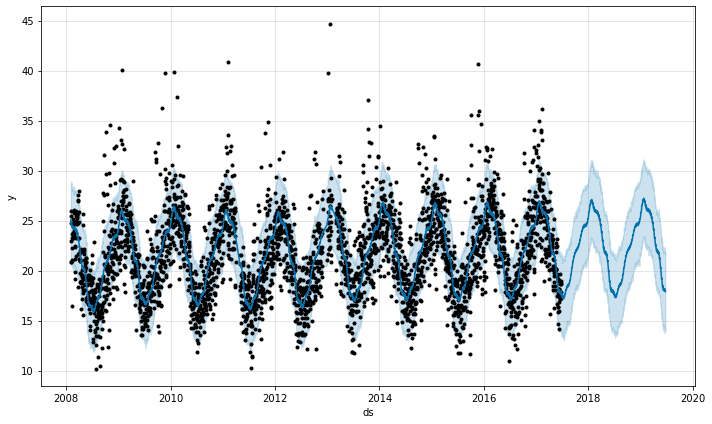

In [34]:
# plot the forecast including the lower and upper boundaries of the forecast (confidence interval)
plot1 = model.plot(forecast)

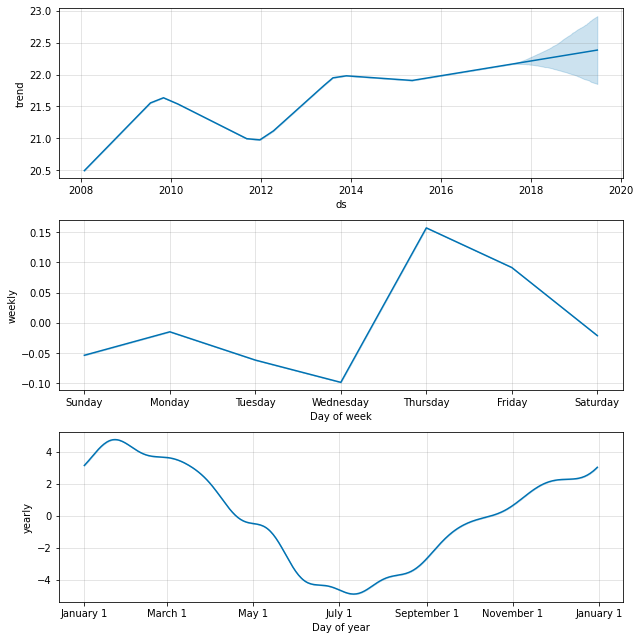

In [35]:
# plot the trend + weekly + monthly seasonalities
plot1 = model.plot_components(forecast)

### Set higher uncertainty in the prediction

In [36]:
# By default, the confidence interval of model is set at 80%. We will increase to 95% confidence interval.
forecast = Prophet(interval_width=0.95).fit(ts).predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


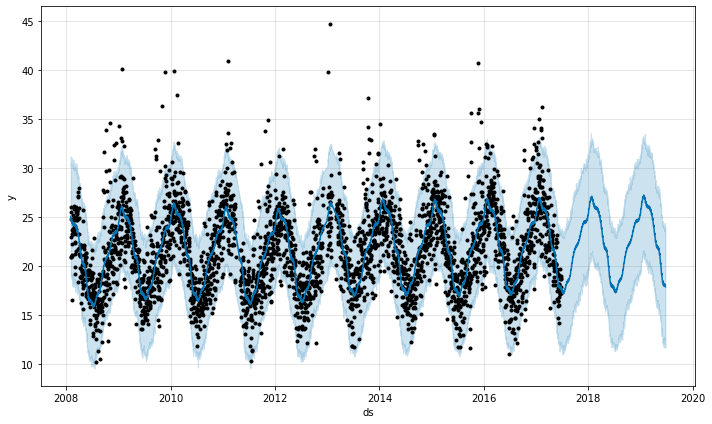

In [37]:
plot1 = model.plot(forecast)

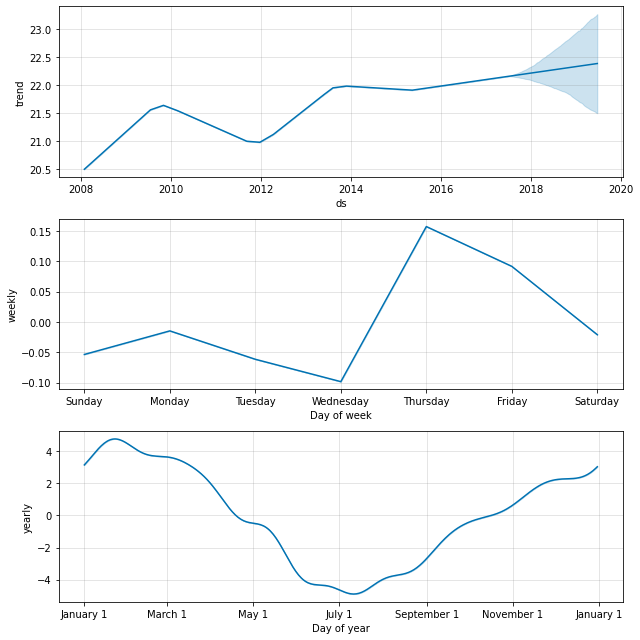

In [38]:
plot1 = model.plot_components(forecast)

In [41]:
# plotly jupyter lab does not work now, will try again later
#from fbprophet.plot import plot_plotly, plot_components_plotly
#plot_plotly(model, forecast)

### How good is the model prediction? We wil use cross validation - a technique which split the data set for training and testing

In [44]:
# we will ask the model to predict the temperature forward in 365 days and compare the actual temperature.
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon = '365 days')

INFO:fbprophet:Making 11 forecasts with cutoffs between 2011-06-27 00:00:00 and 2016-06-25 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

In [51]:
# yhat is the predicted temperature where as yhat_lower and yhat_upper are the confidence intervals.
# cutoff is the date they begin the make the prediction with model train with data before the cutoff date.
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-06-28,16.762546,12.739135,20.469729,16.3,2011-06-27
1,2011-06-29,16.754037,13.077549,20.488003,14.6,2011-06-27
2,2011-06-30,17.131927,13.229610,20.847348,16.2,2011-06-27
3,2011-07-01,17.008972,13.354052,20.455103,16.2,2011-06-27
4,2011-07-02,17.116094,13.341567,20.871244,18.9,2011-06-27


In [52]:
# various performance metrics can be examined icluding mape (mean absolute percentage error) and mdape (median absolute perecentage error)
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
654,363 days 00:00:00,10.244558,3.200712,2.394645,0.114302,0.093334,0.805913
655,363 days 12:00:00,10.096703,3.177531,2.374574,0.113456,0.092479,0.811054
656,364 days 00:00:00,9.969919,3.157518,2.359366,0.112966,0.092479,0.814910
657,364 days 12:00:00,9.952216,3.154713,2.358341,0.112925,0.090616,0.816624
658,365 days 00:00:00,9.661797,3.108343,2.345885,0.113251,0.093988,0.821594


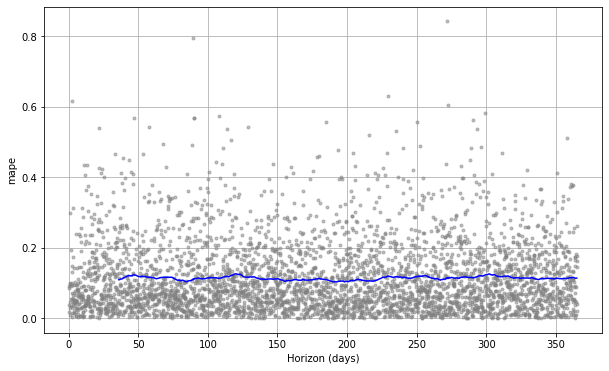

In [48]:
# The metrics can be plotted against the days in the prediction horizon
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

## Episode 3 Coding Summary
1. Use `model = Prophet()` and `model.fit(ts)` to initiate the model and apply the fit method to time series ts
2. Use `future = model.make_future_dataframe(periods=730)` and `forecast = model.predict(future)` to predict the future 2 years of time series
3. Use ` model.plot_components(forecast)` to plot trend and seasonality components of time series

## Exercise 3: 

1. Apply the Prophet model to predict the rainfall of sydney in the next 2 years after 2018

## Answer to Exercise 3: 

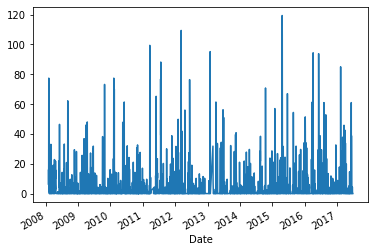

In [53]:
rts = sydn['Rainfall'].plot()

In [54]:
rts = sydn[['Date','Rainfall']]
rts.columns=['ds','y']
rts.head()

,ds,y
Date,,
2008-02-01,2008-02-01,15.6
2008-02-02,2008-02-02,6.0
2008-02-03,2008-02-03,6.6
2008-02-04,2008-02-04,18.8
2008-02-05,2008-02-05,77.4


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


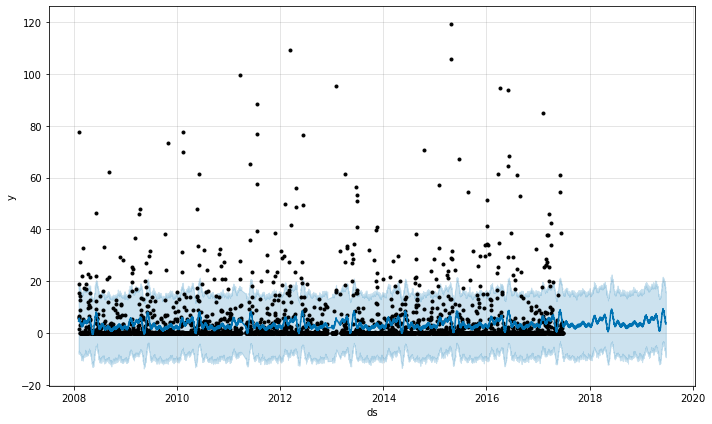

In [57]:
model2 = Prophet()
model2.fit(rts)
future = model2.make_future_dataframe(periods=730)
forecast = model2.predict(future)
plot1 = model2.plot(forecast)

### Cleary, Rainfall is more difficult to predict. Anything we can do to make it more predictable?